In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from data_preprocessing_final import *

In [79]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

In [80]:
df = pd.read_csv("./data/Ames_Housing_Price_Data.csv", index_col=0) #load df

In [81]:
df = cleaning(df) #calling the cleaning function from data_preprocessing_final

In [82]:
df.shape

(2578, 81)

In [83]:
factors,Y = dummify_func(df) # running dummifying function, returns factors and sales (dependent variable)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D1E5769D0>]],
      dtype=object)

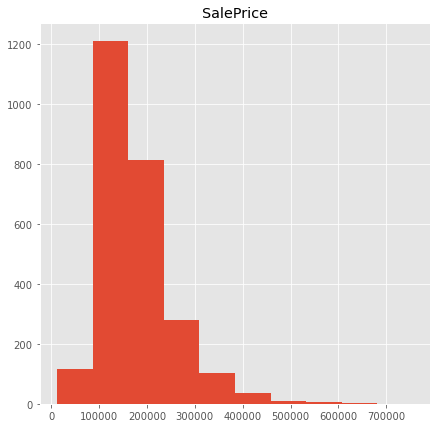

In [84]:
Y.hist()

In [85]:
Y = np.log(Y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D07A24400>]],
      dtype=object)

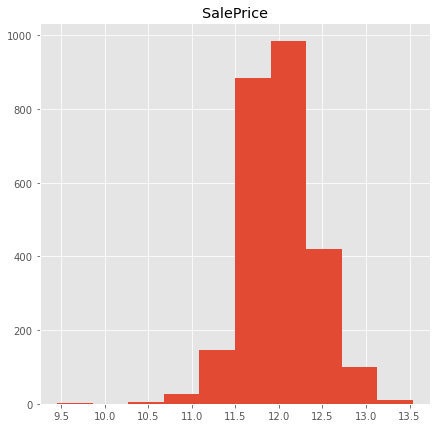

In [86]:
Y.hist()

In [87]:
# remove PID so we can run Ridge Regression
del factors['PID'] 

# Attempt on Ridge Regression
- create our train/test set 75/25
- Attempt 1 - without train/test data (alpha = 1)

In [88]:
# creating our test/train data
x_train, x_test, Y_train, Y_test = train_test_split(factors, Y, test_size=0.25, random_state=0)

In [89]:
ridge = Ridge()

### Attempt 1 - without train/test data (alpha = 1)

In [90]:
ridge.set_params(alpha=1, normalize=False)
ridge.fit(factors,Y)
ridge.score(factors,Y) #R-squared is 0.9322 with standard

0.9400611404659928

### Attempt 2 - with train/test data 
- selecting 1e-3 to 200 with 1000 #s as my alpha testing
- graphs to show coefficient and R2 against alpha

In [91]:
coefs = []
intercepts = []
train_R2  = []
test_R2 = []
alphaRange = np.linspace(1e-3,200,1000)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha, normalize=False)  
          ridge.fit(x_train,Y_train)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          train_R2.append(ridge.score(x_train,Y_train))
          test_R2.append(ridge.score(x_test,Y_test))

In [92]:
# creating default graph settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,7)

Text(0.5, 1.0, 'Change of Ridge Intercept Varying Alpha')

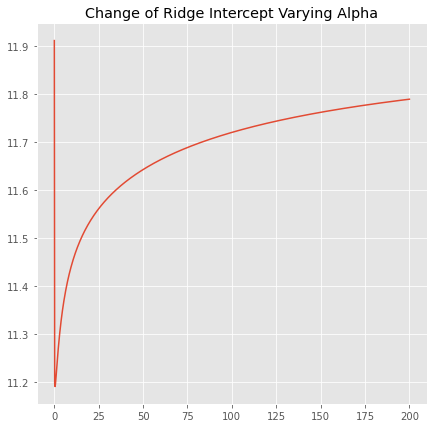

In [93]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')

# weird, i would expect the line to keep going toward 0

Text(0.5, 1.0, 'Change of $R^2$ Varying Alphas')

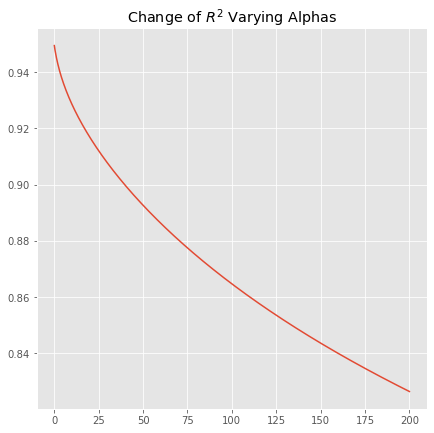

In [94]:
plt.plot(alphaRange, R2)
plt.title(r'Change of $R^2$ Varying Alphas')

# this seems to make sense R-squared goes down as alpha increases

### Trying to find optimal Alpha where train/test R2 converge
- print out list of coefficients to compare
- check our r-squared values for our train/test data after selecting an optimal alpha

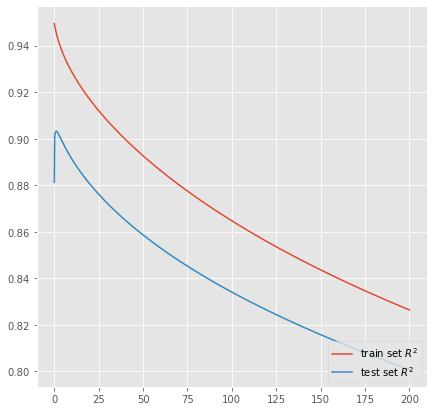

In [99]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

# no clear alpha

### List of Coefficients

In [123]:
ridge.set_params(alpha=5)
ridge.fit(factors, Y)
coefDF = pd.Series(ridge.coef_.reshape(-1,), index=factors.columns) #not sure why this wasn't working
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are \n %s' %(coefDF))

The intercept is 11.2593
The slopes are 
 GrLivArea                   0.467781
LotArea                     0.158398
YearBuilt                   0.152491
YearRemodAdd                0.051098
1stFlrSF                    0.500428
2ndFlrSF                    0.152127
LowQualFinSF                0.001719
FullBath                    0.142530
HalfBath                    0.062391
BedroomAbvGr               -0.012812
KitchenAbvGr               -0.042810
TotRmsAbvGrd                0.124281
Fireplaces                  0.135158
WoodDeckSF                  0.072210
OpenPorchSF                 0.028545
EnclosedPorch               0.081570
3SsnPorch                   0.057180
ScreenPorch                 0.112971
PoolArea                   -0.003164
MSZoning_C (all)           -0.129114
MSZoning_FV                 0.028982
MSZoning_I (all)           -0.001126
MSZoning_RH                 0.038078
MSZoning_RL                 0.060639
MSZoning_RM                 0.017887
Street_Pave                -0.017

In [124]:
df_coef = pd.DataFrame(coefDF, columns = ['Coefficient'])

In [125]:
df_coef.sort_values(by=['Coefficient'])

,Coefficient
OverallQual_2,-0.252876
OverallCond_2,-0.152125
Condition2_PosN,-0.142910
MSZoning_C (all),-0.129114
OverallCond_3,-0.117428
Neighborhood_MeadowV,-0.102589
OverallQual_3,-0.099614
BldgType_Twnhs,-0.089339
MSSubClass_160,-0.082944
KitchenQual_Fa,-0.080568


In [101]:
# random guess and said alpha is optimal at 5

ridge.set_params(alpha=5)
ridge.fit(factors, Y)
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

{'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.9350696828103184
Test R-Squared: 0.927385144402368


### Attempt 3 - using GridSearch 
- do the same as above but using GridSearch
- setting a different alphaRange for this one, 0.001 to 100 with 1000 numbers

In [114]:
alphaRange = np.linspace(0.001,100,1000)

#setting our params using alphaRange for our GridSearch
params = {'alpha': alphaRange, 'max_iter' : [1000000]}

In [115]:
#creating grid object
grid = GridSearchCV(ridge, params, scoring = 'r2')

#fitting it to our training data
grid.fit(x_train, Y_train)

GridSearchCV(estimator=Ridge(alpha=5),
             param_grid={'alpha': array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00,...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]),
                         'max_iter': [1000000]},
             scoring='r2')

In [117]:
print(grid.best_params_) #2.103 is the best alpha according to gridSearch.. our graph did display a similiar result

{'alpha': 2.103081081081081, 'max_iter': 1000000}


In [118]:
# re-fitting our ridge using the new alpha

ridge.set_params(alpha=2.103081081081081)
ridge.fit(factors, Y)
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

{'alpha': 2.103081081081081, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.9397473158619217
Test R-Squared: 0.9325831063212567
